#Challenge Overview:
BigMart's team of data scientists has meticulously gathered sales data encompassing 1559 unique products across 10 distinct stores situated in various cities throughout the year 2013. Each product is characterized by specific attributes that distinguish it from others.

#Problem Context:
This presents a supervised machine learning challenge where the focal point is predicting the target variable, namely Item_Outlet_Sales. The intricate task involves deciphering the intricate relationship between product attributes, store characteristics, and the resultant sales figures.

#Key Aspects of the Problem:

Supervised Learning Landscape: The nature of the problem falls within the realm of supervised machine learning, requiring a strategic approach to model development and validation.
Target Variable Definition: The ultimate goal is to predict the sales figure designated as Item_Outlet_Sales, thereby unraveling the intricacies of product-specific and store-specific dynamics.
Objective of the Notebook:
The primary aim of this undertaking is to craft a robust model capable of accurately forecasting the sales figures for each product across every store. The anticipated outcome is to empower BigMart with insights into the critical attributes of products and stores that exert a significant influence on bolstering sales performance.

In [ ]:
#importing libraries
#step1:importing libraries

import numpy as np
import pandas as pd
#VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
#FEATURE ENGENEERING
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#METRICS
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
#TRAIN AND TEST SPLIT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#ML MODELS
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge

In [ ]:
data = pd.read_csv('Train.csv')
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
testdata=pd.read_csv("Test.csv")
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#DATA PREPROCESSING

In [ ]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
  Item_Identifier  Item_Weight Item_Fat_

In [ ]:
print(testdata.info())
print(testdata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW

In [ ]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
print("Missing Values:\n", testdata.isnull().sum())

Missing Values:
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


#checking for unique values in the missing valued columns

In [ ]:
print("Outlet_Size:\n", data.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", data.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [ ]:
print("Outlet_Size:\n", testdata.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", testdata.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 


Item_Weight:
 10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64 




#Imputing missing values in the categorical column "Outlet_Size" with the mode value

In [ ]:
print(f"Test mode, Train mode:\n{data['Outlet_Size'].mode().values[0], testdata['Outlet_Size'].mode().values[0]}")



Test mode, Train mode:
('Medium', 'Medium')


In [ ]:
#train
data['Outlet_Size'] = data['Outlet_Size'].fillna(
data['Outlet_Size'].dropna().mode().values[0])

#test
testdata['Outlet_Size'] = testdata['Outlet_Size'].fillna(
testdata['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
data['Outlet_Size'].isnull().sum(),testdata['Outlet_Size'].isnull().sum()

(0, 0)

As the 'item_weight' column is numerical, it's essential to visualize its distribution for clarity. To achieve this, I'll employ a boxplot using the seaborn library. This graphical representation will provide a concise and insightful overview of the weight distribution.

In [ ]:
# Calculate IQR
Q1 = data['Item_Weight'].quantile(0.25)
Q3 = data['Item_Weight'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Item_Weight'] < lower_bound) | (data['Item_Weight'] > upper_bound)]

# Print the outliers
print("Outliers in 'Item_Weight':")
print(outliers)


Outliers in 'Item_Weight':
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


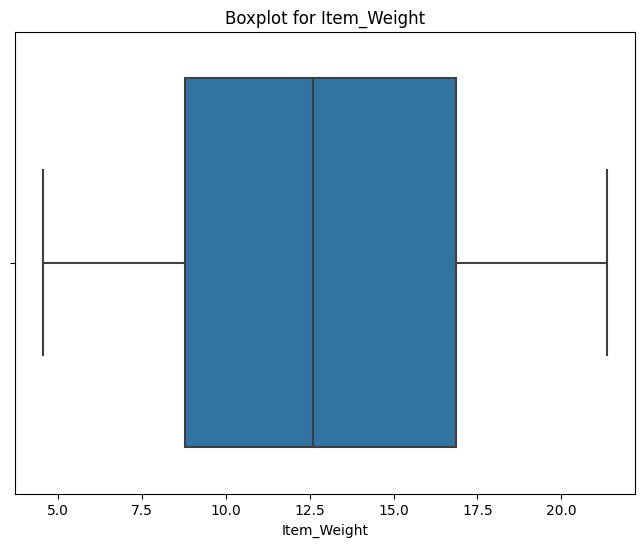

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Item_Weight'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Item_Weight'])
plt.title('Boxplot for Item_Weight')
plt.show()


In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
testdata['Item_Weight'].fillna(testdata['Item_Weight'].mean(), inplace=True)
#checking if we filled missing values
data['Item_Weight'].isnull().sum(),testdata['Item_Weight'].isnull().sum()

(0, 0)

#spliting our data to categorical and numerical data,


In [ ]:
# List of all numeric and categorical columns
numeric_columns = data.select_dtypes('number').columns.to_list()
categorical_columns = data.select_dtypes('object').columns.to_list()

# Create separate dataframes for numeric and categorical columns
numeric_df = data[numeric_columns]
categorical_df = data[categorical_columns]

# Print unique value counts for each categorical column (excluding the first column)
for category in categorical_columns[1:]:
    print(data[category].value_counts())


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocer

We've identified recurring values with distinct names in the "Item_Fat_Content" column. To address this, we will rectify the inconsistencies by employing the .replace() method.

In [ ]:
# Train and test datasets
datasets = [data, testdata]

# Replace variations in 'Item_Fat_Content'
for dataset in datasets:
    dataset['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                        ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

# Check the result
print("Train dataset 'Item_Fat_Content' value counts:")
print(data['Item_Fat_Content'].value_counts())


Train dataset 'Item_Fat_Content' value counts:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [ ]:
#creating our new column for both datasets
data['Outlet_Age'], testdata['Outlet_Age']= data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), testdata['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

#Data Visualization

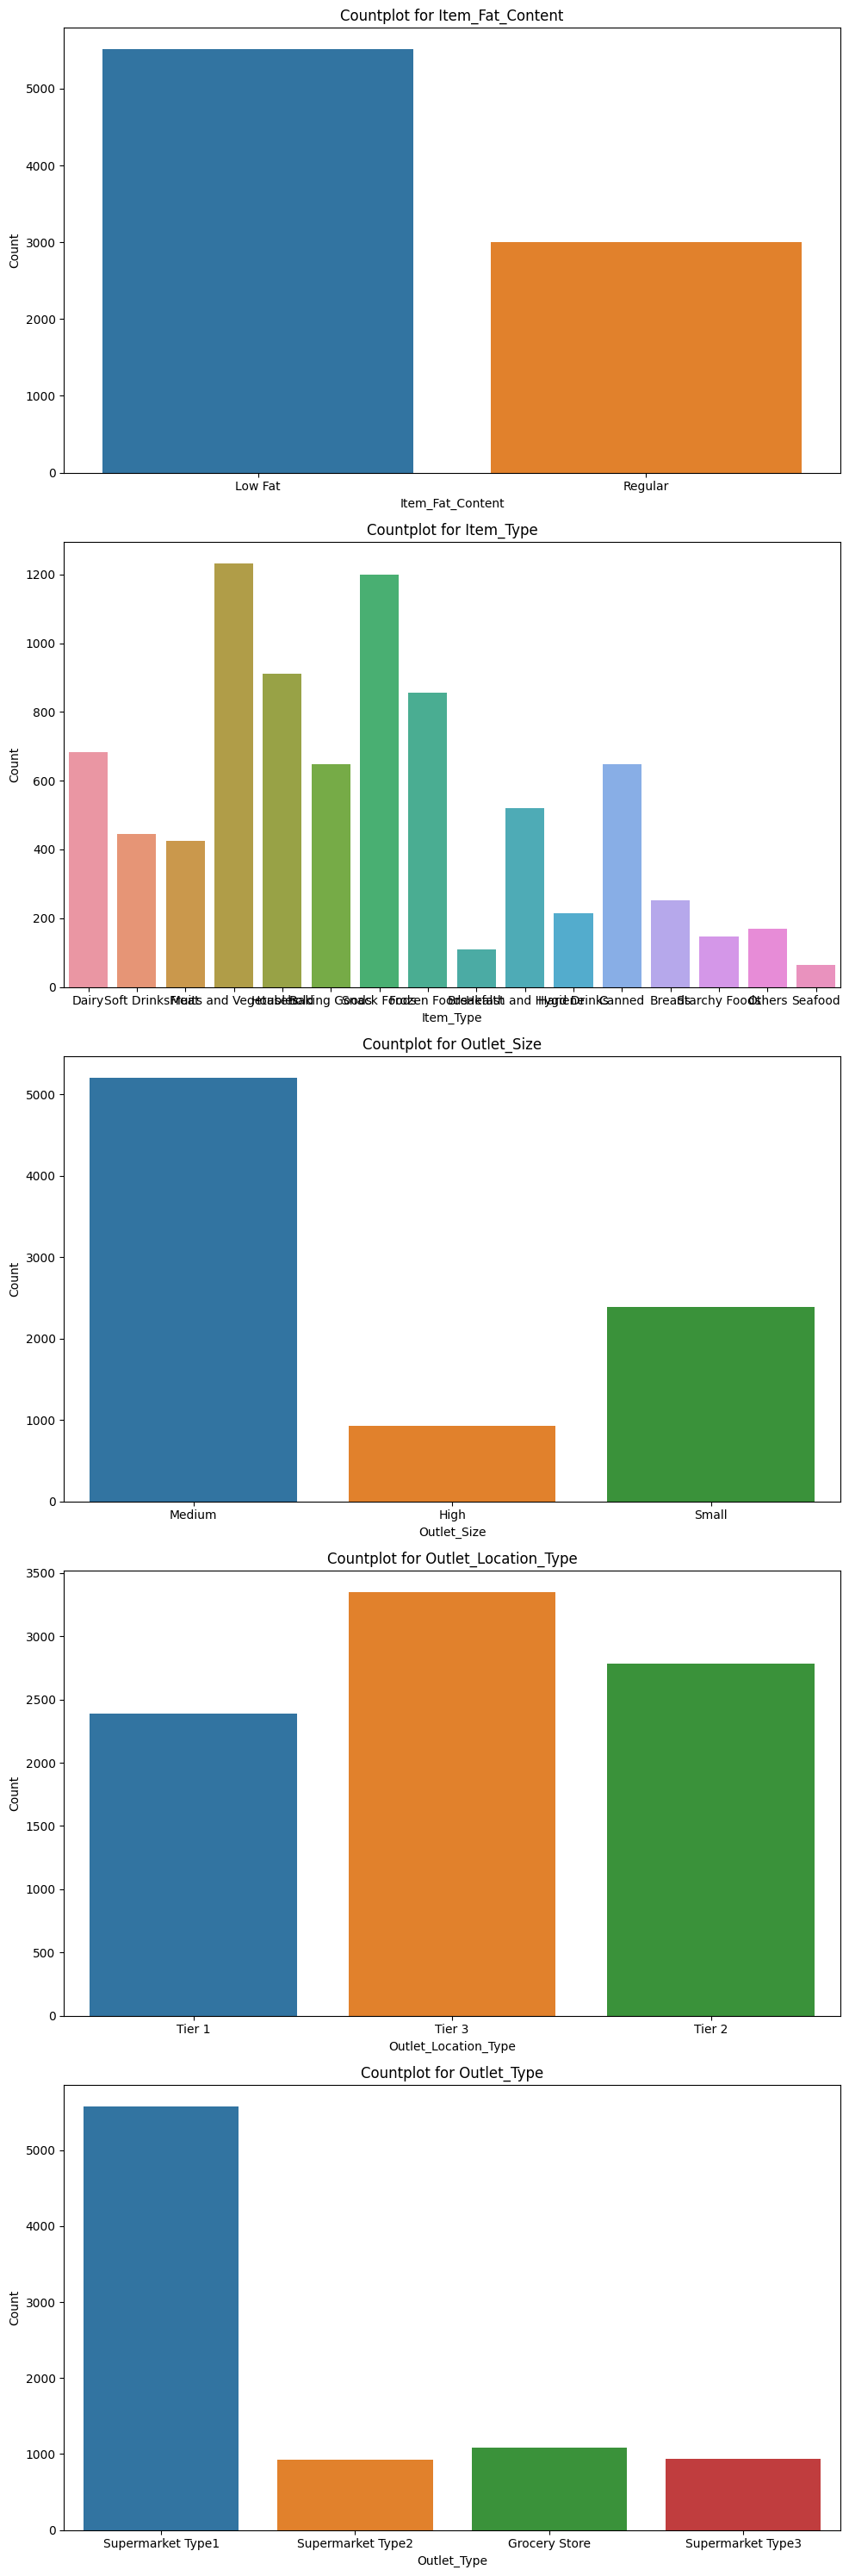

In [ ]:
# List of categorical columns to create countplots
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6 * len(categorical_columns)))

# Create countplots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Countplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Item_Fat_Content: The majority of items sold fall under the "Low Fat" category.

Item_Type: Notable popular item types include fruits, vegetables, and snack foods.

Outlet_Identifier: The distribution of sold items is relatively even across outlets, except for OUT010 and OUT019, which have significantly lower sales.

Outlet_Size: In our dataset, Bigmart outlets are predominantly medium-sized.

Outlet_Location_Type: The most prevalent location type for outlets is Tier 3.

Outlet_Type: The overwhelmingly predominant outlet type is "Supermarket Type1," surpassing other types by a considerable margin.

#plots for numerical columns


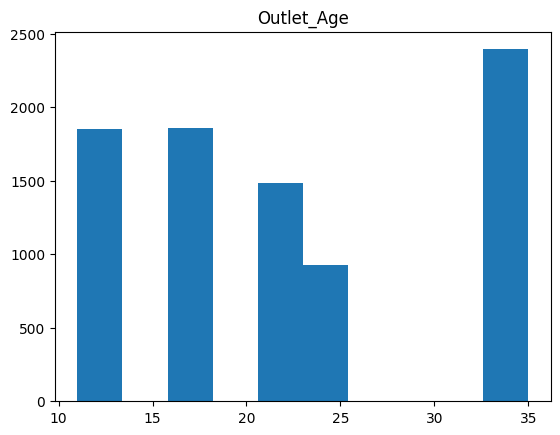

In [ ]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  data[num]

plt.hist(data['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

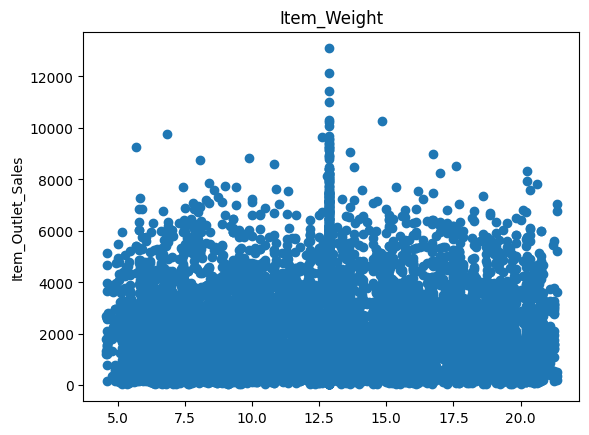

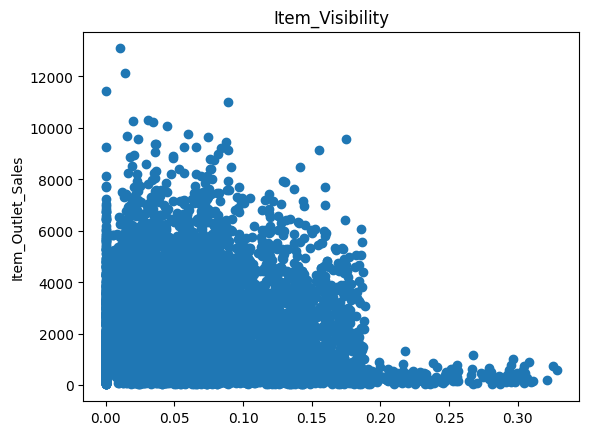

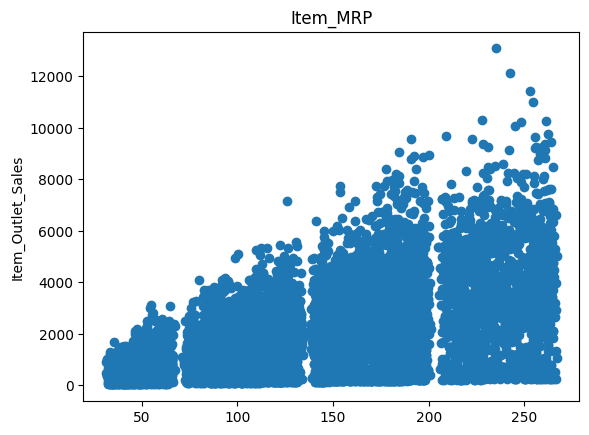

In [ ]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#multivariate

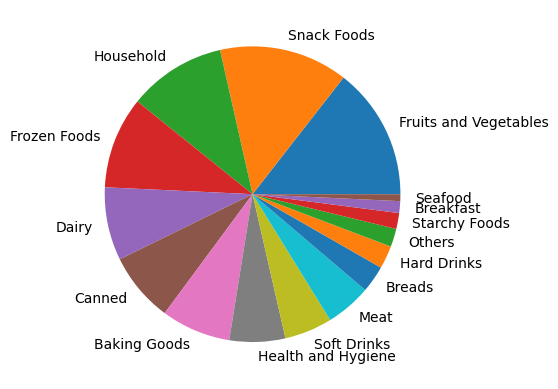

In [ ]:
plt.pie(data['Item_Type'].value_counts(), labels=data['Item_Type'].value_counts().index)
plt.show()

#correlation matrix

<ipython-input-157-d7b8175d2c37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() ,cmap='rocket')


<Axes: >

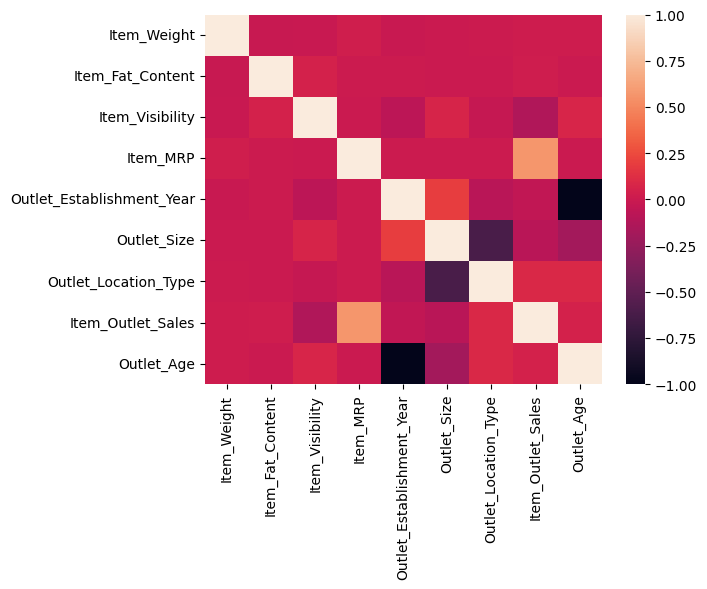

In [ ]:
#plotting the correlation matrix
sns.heatmap(data.corr() ,cmap='rocket')

In [ ]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    data[i] = le.fit_transform(data[i])
    testdata[i] = le.fit_transform(testdata[i])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [ ]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(testdata[cols])).astype('int64')

#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = data.index
te_oh.index = testdata.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([data, tr_oh], axis=1)
te_fe = pd.concat([testdata, te_oh], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
testdata.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Age                   0
dtype: int64

#Droping Irrelavent Columns

In [ ]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

#machine learning models

In [ ]:
y = data['Item_Outlet_Sales']
X = data.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [ ]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

#LINEAR REGRESSION
In statistics, linear regression is a method that models the connection between a single outcome (dependent variable) and one or more predictors (independent variables) in a linear fashion.

Widely regarded as the pioneering form of regression analysis, linear regression has been extensively employed in practical applications. The preference for linear models stems from their ease of fitting when the relationship is linearly dependent on unknown parameters. Additionally, the statistical properties of the resulting estimators are more straightforward to ascertain compared to models with non-linear parameter relationships.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Assuming 'categorical_cols' contains the names of categorical columns in your dataset
categorical_cols = ['Item_Type', 'Outlet_Type']

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with transformers and LinearRegression
LR = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
LR.fit(X_train, y_train)

# Predict on the test set
y_predict = LR.predict(X_test)

# Evaluation metrics
LR_MAE = round(mean_absolute_error(y_test, y_predict), 2)
LR_MSE = round(mean_squared_error(y_test, y_predict), 2)
LR_R2 = round(r2_score(y_test, y_predict), 4)

print(f"Mean Absolute Error: {LR_MAE}")
print(f"Mean Squared Error: {LR_MSE}")
print(f"R^2 Score: {LR_R2}")

# Cross-validation
cross_val_scores = cross_val_score(LR, X, y, cv=5)
LR_CV = round(cross_val_scores.mean(), 4)
print(f"Cross-Validation Score: {LR_CV}")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error: 838.19
Mean Squared Error: 1285793.54
R^2 Score: 0.5593


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-Validation Score: 0.5574


In [ ]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'categorical_cols' contains the names of categorical columns in your dataset
categorical_cols = ['Item_Type', 'Outlet_Type']

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with transformers and RandomForestRegressor
RF = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

# Fit the pipeline
RF.fit(X_train, y_train)

# Predict on the test set
y_predict = RF.predict(X_test)

# Evaluation metrics
RF_MAE = round(mean_absolute_error(y_test, y_predict), 2)
RF_MSE = round(mean_squared_error(y_test, y_predict), 2)
RF_R2 = round(r2_score(y_test, y_predict), 4)

print(f"Mean Absolute Error: {RF_MAE}")
print(f"Mean Squared Error: {RF_MSE}")
print(f"R^2 Score: {RF_R2}")

# Cross-validation for R^2 score
cross_val_scores = cross_val_score(RF, X, y, cv=5, scoring='r2')
RF_CV = round(cross_val_scores.mean(), 4)
print(f"Cross-Validation R^2 Score: {RF_CV}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error: 798.92
Mean Squared Error: 1323163.6
R^2 Score: 0.5465


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Cross-Validation R^2 Score: 0.5489


#Lasso Regressor

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'categorical_cols' contains the names of categorical columns in your dataset
categorical_cols = ['Item_Type', 'Outlet_Type']

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with transformers and Lasso Regressor
lasso_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))  # You can adjust the alpha parameter as needed
])

# Fit the pipeline
lasso_regressor.fit(X_train, y_train)

# Predict on the test set
y_predict = lasso_regressor.predict(X_test)

# Evaluation metrics
lasso_MAE = round(mean_absolute_error(y_test, y_predict), 2)
lasso_MSE = round(mean_squared_error(y_test, y_predict), 2)
lasso_R2 = round(r2_score(y_test, y_predict), 4)

print(f"Mean Absolute Error: {lasso_MAE}")
print(f"Mean Squared Error: {lasso_MSE}")
print(f"R^2 Score: {lasso_R2}")

# Cross-validation for R^2 score
cross_val_scores = cross_val_score(lasso_regressor, X, y, cv=5, scoring='r2')
lasso_CV = round(cross_val_scores.mean(), 4)
print(f"Cross-Validation R^2 Score: {lasso_CV}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error: 836.46
Mean Squared Error: 1282393.14
R^2 Score: 0.5604


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-Validation R^2 Score: 0.5591


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#conclusion


In [ ]:
# Assuming you have calculated MAE, MSE, R2, and Cross-Validation scores for Linear Regression (LR),
# Random Forest Regressor (RF), and Lasso Regressor (LS)

# Random Forest Regressor metrics
RF_MAE = round(mean_absolute_error(y_test, y_predict), 2)
RF_MSE = round(mean_squared_error(y_test, y_predict), 2)
RF_R2 = round(r2_score(y_test, y_predict), 4)

# Assuming you have calculated Cross-Validation R^2 Score for Random Forest Regressor
cross_val_scores_RF = cross_val_score(RF, X, y, cv=5, scoring='r2')
RF_CV = round(cross_val_scores_RF.mean(), 4)

# Create a DataFrame with the metrics
Metrics = pd.DataFrame({
    'models': ["Linear Regression", "Random Forest Regressor", "Lasso Regressor"],
    'MAE': [LR_MAE, RF_MAE, lasso_MAE],
    'MSE': [LR_MSE, RF_MSE, lasso_MSE],
    'R^2': [LR_R2, RF_R2, lasso_R2],
    'Cross Validation Score': [LR_CV, RF_CV, lasso_CV]
})

# Sort the DataFrame by MAE in ascending order
Metrics_sorted_by_MAE = Metrics.sort_values(by='MAE', ascending=True)
print(Metrics_sorted_by_MAE)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

                    models     MAE         MSE     R^2  Cross Validation Score
1  Random Forest Regressor  836.46  1282393.14  0.5604                  0.5467
2          Lasso Regressor  836.46  1282393.14  0.5604                  0.5591
0        Linear Regression  838.19  1285793.54  0.5593                  0.5574


Insights:

Item_MRP positively correlates with Maximum Outlet sales, making it an effective optimizer.
Linear Regression and Lasso Regressor consistently demonstrate superior performance across most categories.
The Random Forest Regressor explains only a third of observed variation, indicating suboptimal performance despite high cross-validation.
Optimization through tuning, such as Grid Search, is recommended for enhanced model performance.





